# ANSI 256-color (8-bit) palette

Unix terminals generally support the 16 (4-bit) and 256 (8-bit) color palettes, with most (if not all) terminals now supporting RGB colors. The full color breakdown (below) is the full 256-color palette with with their appropriate identifier in the 8-bit sequence. The 256-color palette retain backwards compatibility with the 16-color palette by with the breakdown as follows:

- 0-7:     Standard ANSI base colors
- 8-15:    Standard ANSI bright base colors
- 16-231:  216 (6<sup>3</sup>) color palette
- 232-255: 24 variant gray palette

> The standard 0-15 ANSI 16-color palette is simply a fixed ahead of a selection of the 216-color palette to retain backwards compatibility, much the same way that the 24 variant gray palette is afixed to the end of the spectrum.

In [17]:
import sys
for i in range(0, 16):
    for j in range(0, 16):
        code = str(i * 16 + j)
        sys.stdout.write(u"\u001b[48;5;" + code + "m " + code.center(4))
    print(u"\u001b[0m")

  0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
  80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95 
  96   97   98   99  100  101  102  103  104  105  106  107  108  109  110  111 
 112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127 
 128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143 
 144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159 
 160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175 
 176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191 
 192  193  194  195  196  19

# The 216-color palette

After the first 16 colors, there is an array of 216 colors that are explicitly mapped to a 6x6x6 (6<sup>3</sup>) cube. The colors are non-uniformly distributed in a 3D space plotted against their RGB color values, with higher RGB color values being more uniformly distributed than lower color values. We see distinct binning occur for RGB values of 

<IPython.core.display.Javascript object>


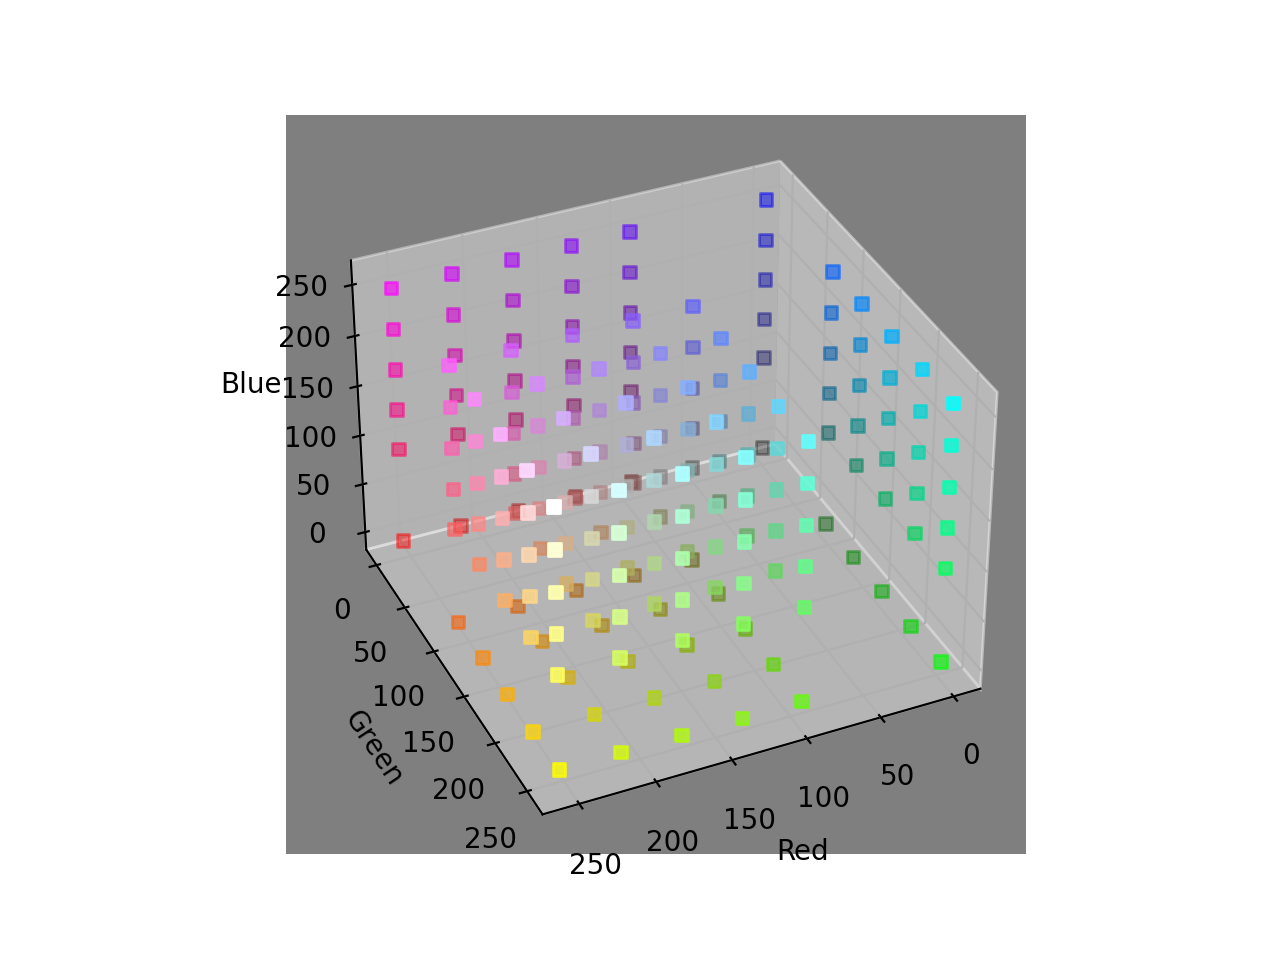

In [14]:
%matplotlib notebook
import json
import pandas as pd
import matplotlib.pyplot as plt

data = []
with open('./color_data/256colors.json') as colors:
    d = json.load(colors)
    for i in d:
        if i["colorId"] > 15 and i["colorId"] <= 231:
            row = [i["colorId"], i["hexString"]] + list(i["rgb"].values())
            data.append(row)

df_data = [row[1:] for row in data]
df = pd.DataFrame(df_data, columns=["Hex", "Red", "Green", "Blue"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Red"], df["Green"], df["Blue"], c=df["Hex"], marker='s')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_facecolor('tab:gray')
plt.show()

In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import pandas as pd

data = []
with open('./color_data/256colors.json') as colors:
    d = json.load(colors)
    for i in d:
        row = [i["colorId"], i["hexString"]] + list(i["rgb"].values()) \
               + list([f"rgb({i['rgb']['r']},{i['rgb']['g']},{i['rgb']['b']})"])
        data.append(row)

df_216 = pd.DataFrame([row[1:] for row in data if row[0] > 15 and row[0] < 232], columns=["Hex", "Red", "Green", "Blue", "RGB"])
df_grey = pd.DataFrame([row[1:] for row in data if row[0] > 231], columns=["Hex", "Red", "Green", "Blue", "RGB"])
df_4bit = pd.DataFrame([row[1:] for row in data if row[0] < 16], columns=["Hex", "Red", "Green", "Blue", "RGB"])

fig = make_subplots(
    rows=2, cols=2,    
    specs=[
        [{'type': 'scatter3d'}, {'type': 'scatter'}],
        [{'type': 'scatter'}, {'type': 'scatter'}]
    ]
)
sp3d = go.Scatter3d(name="216 Color Palette", x=df_216["Red"], y=df_216["Green"], z=df_216["Blue"], mode='markers', marker=dict(color=df_216["RGB"]))
fig.add_trace(sp3d, row=1, col=1)
sp3d = go.Scatter3d(name="24 Gray Palette", x=df_grey["Red"], y=df_grey["Green"], z=df_grey["Blue"], mode='markers', marker=dict(color=df_grey["RGB"]))
fig.add_trace(sp3d, row=1, col=1)
sp3d = go.Scatter3d(name="4-bit Color Palette",x=df_4bit["Red"], y=df_4bit["Green"], z=df_4bit["Blue"], mode='markers', marker=dict(color=df_4bit["RGB"]))
fig.add_trace(sp3d, row=1, col=1)
rb2d = go.Scatter(x=df_216["Red"], y=df_216["Green"], mode='markers', marker=dict(color=df_216["RGB"]))
fig.add_trace(rb2d, row=1, col=2)
rb2d = go.Scatter(x=df_216["Red"], y=df_216["Blue"], mode='markers', marker=dict(color=df_216["RGB"]))
fig.add_trace(rb2d, row=2, col=1)
bg2d = go.Scatter(x=df_216["Blue"], y=df_216["Green"], mode='markers', marker=dict(color=df_216["RGB"]))
fig.add_trace(rb2d, row=2, col=2)

scene = {
    "xaxis": {
        "title": "Red",
        "backgroundcolor": "rgb(128, 128, 128)",
        "gridcolor": "white",
        "showbackground": True,
        "zerolinecolor": "white"
    },
    "yaxis": {
        "title": "Green",
        "backgroundcolor": "rgb(128, 128, 128)",
        "gridcolor": "white",
        "showbackground": True,
        "zerolinecolor": "white"
    },
    "zaxis": {
        "title": "Blue",
        "backgroundcolor": "rgb(128, 128, 128)",
        "gridcolor": "white",
        "showbackground": True,
        "zerolinecolor": "white"
    },
}
fig.update_layout(scene=scene)
fig.show()